＃ビュッフェ形式を再現してみる

In [80]:
#defining the libraries and the environment variables
import os
from dotenv import load_dotenv
import openai
import pandas as pd
import numpy as np
import re
import random

load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")
#print(API_KEY)
openai.api_key = API_KEY

pd.set_option('display.max_colwidth', None)

In [81]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]


In [82]:
prompt="During a lunch break, you are in the college cafeteria where various meal options are available. Please choose your lunch.\n\
You don't have to choose from the entire menu.Please think about how much you eat and take the right amount.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference.\n\
Answer only the menu you chose.\n\
"

In [31]:
choice_1 = "Dynamite chili and tangy lime-seasoned beets"
choice_2 = "Beets"
choice_3 = "Lighter-choice beets with no added sugar"
choice_4 = "High-antioxidant beets"

choice_list = [choice_1, choice_2, choice_3, choice_4]

In [32]:
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [86]:
import random

class Buffet_UTokyo:
    def __init__(self):
        self.choice_1 = "Dynamite chili and tangy lime-seasoned beets"
        self.choice_2 = "Beets"
        self.choice_3 = "Lighter-choice beets with no added sugar"
        self.choice_4 = "High-antioxidant beets"
        self.choice_list = [self.choice_1, self.choice_2, self.choice_3, self.choice_4]

        self.class_1 = "Main dish"
        self.class_2 = "Side dish, Salad"
        self.class_3 = "Rice"
        self.class_4 = "Noodles"
        
        # Main dish
        self.food_1 = [
            "Deep-fried succulent chicken",#手仕込みジューシー唐揚げ
            "Hamburger steak with arrabbiata sauce",#スパイシートマトハンバーグ
        #    "Grilled chicken with salt-based sauce",#グリルチキン（塩だれ）
            "Salt-grilled mackerel"#さば塩焼き
        ]
        # Side dish, Salad
        self.food_2 = [
            "French fries Spicy",#フライドポテト（スパイシー）
        #    "Soft-boiled egg",#温泉たまご
            "Boiled spinach with dried bonito",#ほうれん草のおひたし
        #    "Boiled chopped okura",#オクラのおひたし
        #    "Soy sauce taste boiled dried daikon radish strips",#切り干し大根
        #    "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)",#ツナサラダ
            "Macaroni and corn salad (with wakame seaweed and shredded cabbage)"#マカロニ＆コーンサラダ
        ]
        # Rice
        self.food_3 = [
            "(Small size) Rice",#ごはん(小)
            "(Medium size) Rice",#ごはん(中)
            "(Large size) Rice"#ごはん(大)
        ]
        # Noodles
        self.food_4 = [
            "Plain udon noodles",#かけうどん
            "Zaru soba cool soba noodles",#ざるそば
            "Ramen in soy-sauce flavored soup"#醤油ラーメン
        ]

    def generate_buffet_prompt(self):
        #random_choice = "Dynamite chili and tangy lime-seasoned beets"#random.choice(self.choice_list)
        #self.food_2.append(random_choice)

        # Shuffle each food category list to randomize their order
        random.shuffle(self.food_1)
        random.shuffle(self.food_2)
        random.shuffle(self.food_3)
        random.shuffle(self.food_4)

        
        buffet_prompt = f"{self.class_1}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_1)) + "\n" \
                         f"{self.class_2}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_2)) + "\n" \
                         f"{self.class_3}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_3)) + "\n" \
                         f"{self.class_4}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_4))
        
        return buffet_prompt

# Instance creation and function call
buffet = Buffet_UTokyo()
buffet_prompt = buffet.generate_buffet_prompt()
print(buffet_prompt)

food_list = buffet.food_1 + buffet.food_2 + buffet.food_3 + buffet.food_4


Main dish
1. Deep-fried succulent chicken
2. Salt-grilled mackerel
3. Hamburger steak with arrabbiata sauce
Side dish, Salad
1. French fries Spicy
2. Macaroni and corn salad (with wakame seaweed and shredded cabbage)
3. Boiled spinach with dried bonito
Rice
1. (Medium size) Rice
2. (Large size) Rice
3. (Small size) Rice
Noodles
1. Ramen in soy-sauce flavored soup
2. Zaru soba cool soba noodles
3. Plain udon noodles


In [35]:
words_list = ["apple", "banana", "cherry"]
text = "I ate an apple and a banana today, but I didn't see any."

# 各単語の出現回数をカウント
def count_words(text, words_list):
    counts = {word: text.count(word) for word in words_list}
    food_selected = []

    # 結果を表示
    for food, count in counts.items():
        if count > 0:
            food_selected.append(food)
            break
    return food_selected

# 関数を実行
vegetable_selected = count_words(text, words_list)
print(vegetable_selected)

['apple']


In [78]:


def buffet_vegetable_preference(prompt,range_number):
    global food_list

    df = pd.DataFrame()

    for i in range(range_number):
        attribute = "college student"
        #attribute = random.choice(attribute_list)

        role = f"you are {attribute}."
        #you have to behave like {attribute}."

        buffet_prompt = buffet.generate_buffet_prompt()

        response = generate_completion(role, buffet_prompt, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        counts = {food: content.count(food) for food in food_list}


        df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":[counts]},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df


In [40]:
from collections import Counter
import pandas as pd

# Example DataFrame
df_2 = pd.DataFrame({
    "number": [
        {'a': 1, 'b': 2},
        {'a': 2, 'c': 3},
        {'b': 1, 'd': 4},
        {'a': 1, 'd': 2},
        {'c': 1, 'e': 2}
    ]
})

result_dict = Counter()  # Start with an empty Counter object for simplicity

# Loop through each dictionary stored in the DataFrame's "number" column
for i in range(len(df_2)):
    dic_1 = df_2["number"][i]
    # Update the result counter by adding counts from the current dictionary
    result_dict.update(dic_1)

# Print the final summed dictionary
print(result_dict)

Counter({'d': 6, 'a': 4, 'c': 4, 'b': 3, 'e': 2})


In [68]:
from collections import Counter
def count_number(df):
    result_dict = Counter()
    for i in range(len(df)):
        dic_1 = df["number"][i]
        # Update the result counter by adding counts from the current dictionary
        result_dict.update(dic_1)
    return result_dict

In [83]:
import matplotlib.pyplot as plt

def plot_bar(result_dict):
    # Creating a bar plot
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.bar(result_dict.keys(), result_dict.values(), color='blue')  # Create a bar plot

    plt.xlabel('Keys')  # Label on X-axis
    plt.ylabel('Counts')  # Label on Y-axis
    plt.title('Bar plot of Result Dictionary')  # Title of the plot

    plt.xticks(rotation=270)  # Rotate x-axis labels for better visibility if required
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

<class 'collections.Counter'>


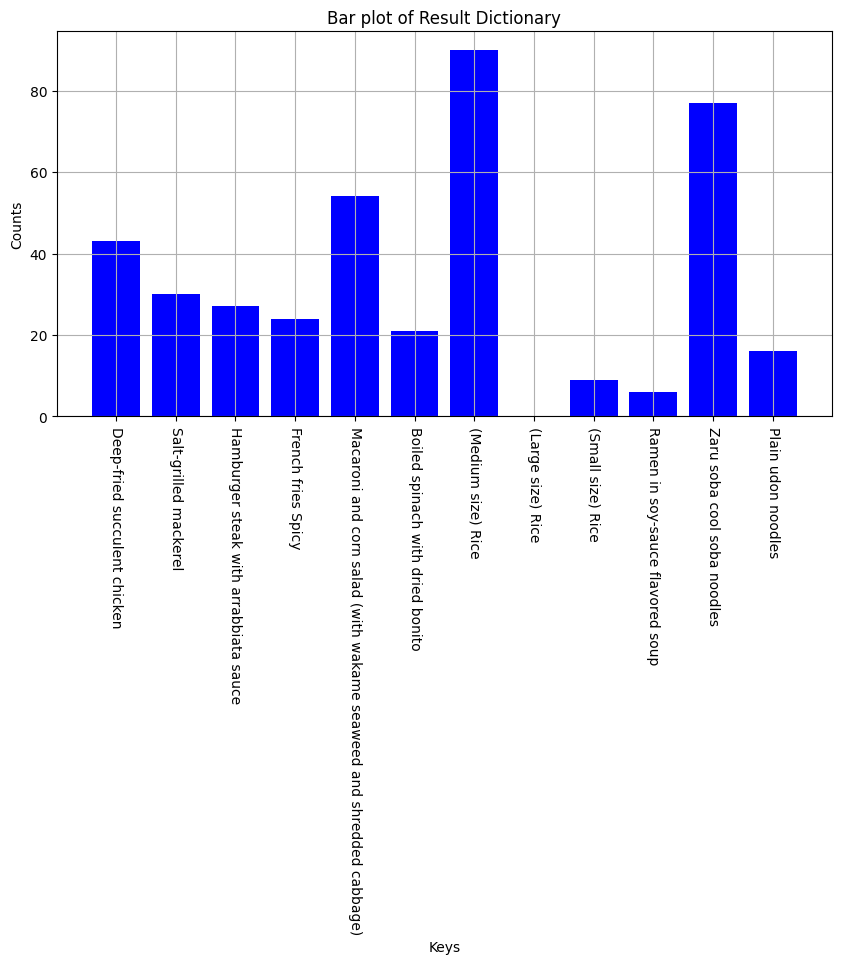

In [88]:
df_1 = buffet_vegetable_preference(prompt,100) 
df_1.head()
dict_1 = count_number(df_1)
print(type(dict_1))

plot_bar(dict_1)

<class 'collections.Counter'>


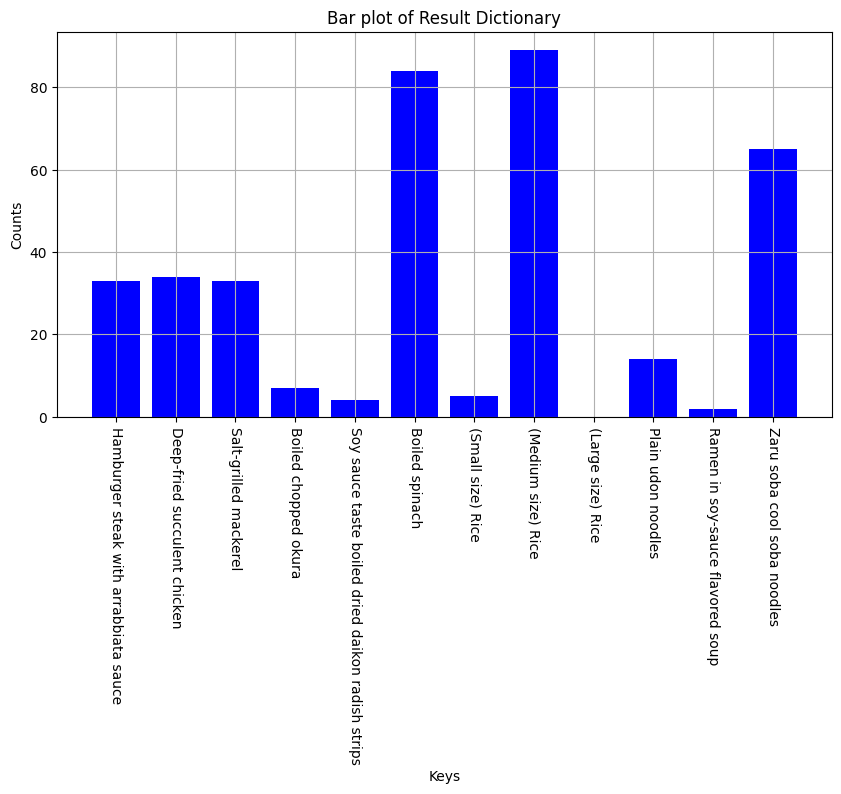

In [69]:
dict_1 = count_number(df_1)
print(type(dict_1))

plot_bar(dict_1)

In [53]:
df_2 = buffet_vegetable_preference(prompt,100)
df_2.head()
result_dict_2 = count_number(df_2)


Counter({'(Medium size) Rice': 89, 'Boiled spinach': 87, 'Zaru soba cool soba noodles': 65, 'Deep-fried succulent chicken': 44, 'Hamburger steak with arrabbiata sauce': 34, 'Salt-grilled mackerel': 22, 'Plain udon noodles': 12, 'Soy sauce taste boiled dried daikon radish strips': 5, '(Small size) Rice': 4, 'Boiled chopped okura': 2, 'Ramen in soy-sauce flavored soup': 1, '(Large size) Rice': 0})


NameError: name 'plot_bar' is not defined

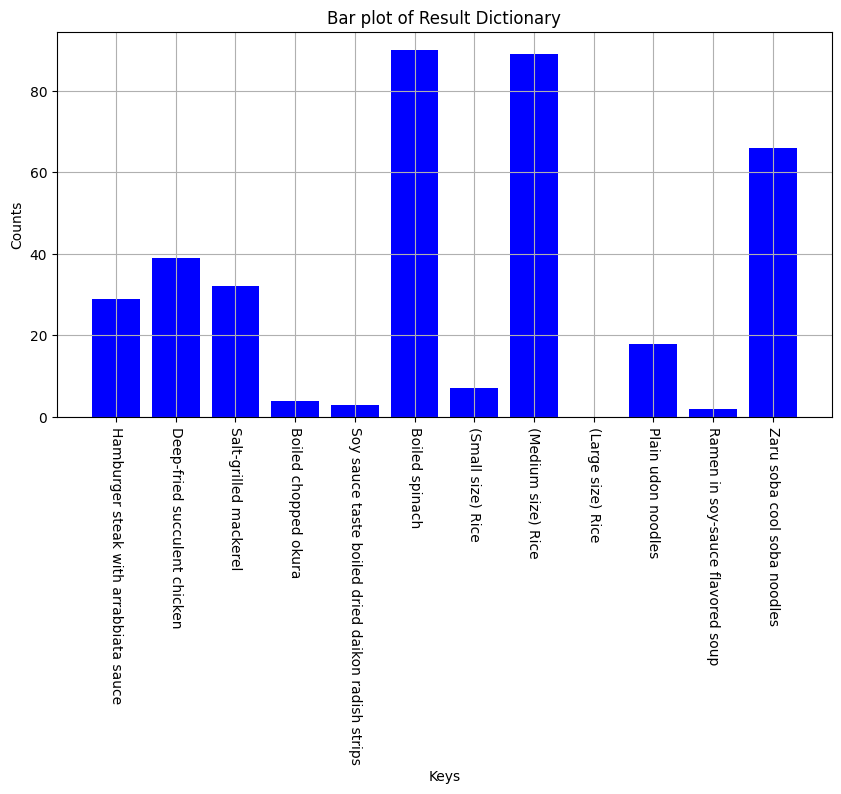

In [72]:
df_3 = buffet_vegetable_preference(prompt,100)
df_3.head()
result_dict_3 = count_number(df_3)
plot_bar(result_dict_3)

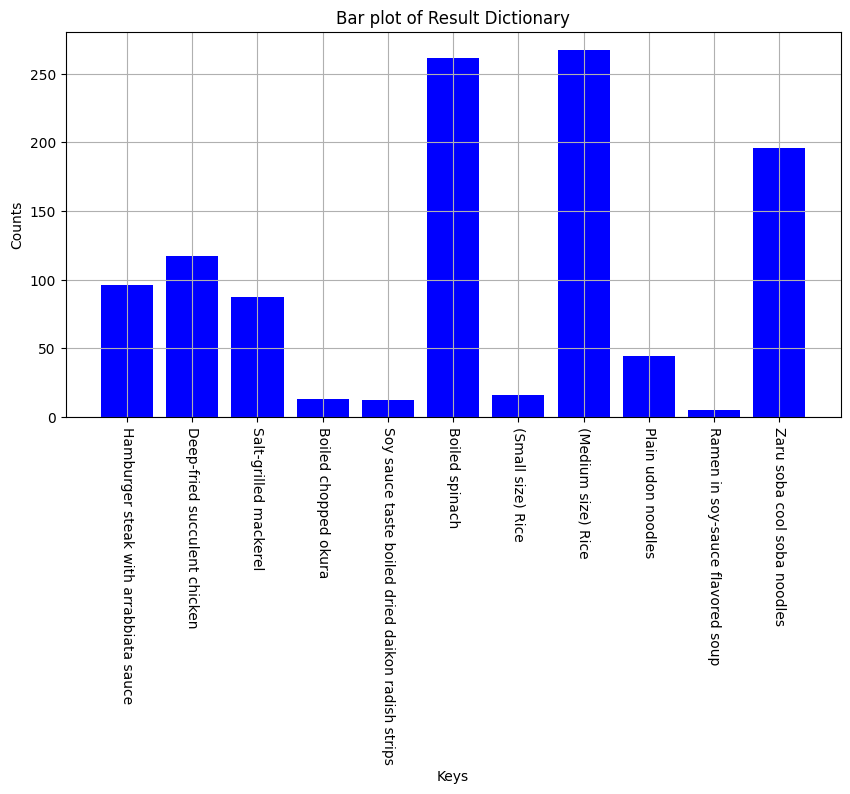

In [73]:
result_dict = Counter(dict_1) + Counter(result_dict_2) + Counter(result_dict_3)
plot_bar(result_dict)

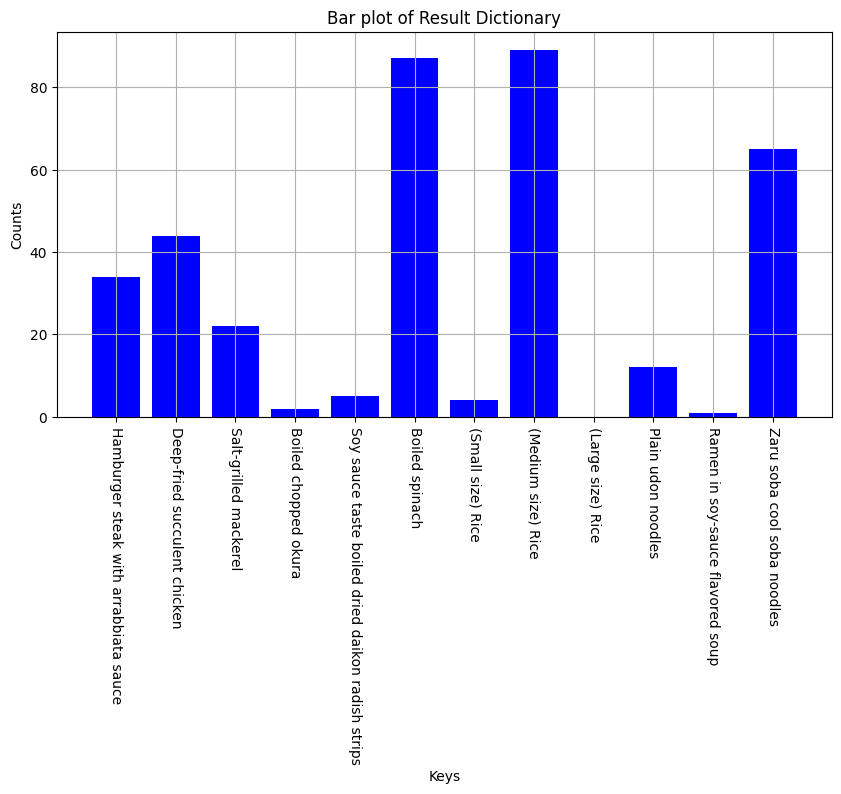

In [71]:
result_dict_2 = count_number(df_2)
plot_bar(result_dict_2)